In [1]:
#https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2019-06-18 05:28:55--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-06-18 05:28:55--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-06-18 05:28:55--  https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.so

In [1]:
import plotly 
plotly.tools.set_credentials_file(username='vishnuerm', api_key='f447I6zhAYqQZLuakUQ7')
%matplotlib inline 
import pprint
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Plotly
import plotly.plotly as py
import plotly.tools as tls

from talib import RSI, BBANDS,MACD,EMA

ModuleNotFoundError: No module named 'talib'

In [5]:
pip install nsepy

  Stored in directory: /root/.cache/pip/wheels/88/89/1e/3dfa14f863314a42481d8926d9ef4825da5d899e026435fc3a
Successfully built nsepy


In [2]:
import pandas_datareader.data as web
import pandas_datareader as pdr
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nsepy import get_history
from talib import RSI, BBANDS
import matplotlib.pyplot as plt
start = '2017-04-22'
end = '2019-04-22'

ModuleNotFoundError: No module named 'pandas_datareader'

In [0]:
data = get_history(symbol='HDFCBANK',
                   start=datetime.datetime(2015,1,1),
                   end=datetime.datetime(2019,6,14))

In [0]:
max_holding = 100
price = data
close = price['Close'].values
up, mid, low = BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
rsi = RSI(close, timeperiod=14)

def bbp(price):
    up, mid, low = BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    bbp = (price['Close'] - low) / (up - low)
    return [bbp,up,mid,low]
  
[bbp,up,mid,low]=bbp(price)
EMA12 = EMA(price['Close'], timeperiod = 12)
EMA26 = EMA(price['Close'], timeperiod = 26)

price['RSI']=rsi

price['BB_low']=low
price['BB_up']=up
price['BBP']=bbp

price['EMA12']=EMA12
price['EMA26']=EMA26

price['EMA']=EMA12-EMA26
price['relEMA']=price['EMA']/EMA12

price=price.dropna()

In [0]:
index=price.index
holdings = pd.DataFrame(index=price.index, data={'Holdings': np.array([np.nan] * index.shape[0])})
holdings.loc[((price['RSI'] < 30) & (price['BBP'] < 0)), 'Holdings'] = max_holding
holdings.loc[((price['RSI'] > 70) & (price['BBP'] > 1)), 'Holdings'] = 0
holdings.ffill(inplace=True)
holdings.fillna(0, inplace=True)

index=price.index

holdings1 = pd.DataFrame(index=price.index, data={'Pointer': np.array([np.nan] * index.shape[0])})

holdings['Order'] = holdings.diff()
holdings.dropna(inplace=True)

In [0]:
old_price = 0
old_rsi=0
count=0
for day, data  in price.iterrows():
  
  today_price = data['Close']
  today_rsi = data['RSI']
  today_EMA=data['EMA']
  rel_EMA=data['relEMA']
  BBP=data['BBP']
  
  if((today_price<old_price) & (today_rsi<old_rsi) & (today_rsi<40)& (BBP < 0.15) &  ((rel_EMA<-0.030) | (rel_EMA>-0.010)) ):
    holdings1.loc[day,'Pointer'] = 1
  elif((today_price>old_price) & (today_rsi>old_rsi) & (today_rsi<50) & (rel_EMA>0.020)):
    holdings1.loc[day,'Pointer'] = 1
  else:
    holdings1.loc[day,'Pointer'] = 0
  end
  old_price=today_price
  old_rsi=today_rsi
  count=count+1
      
 
  

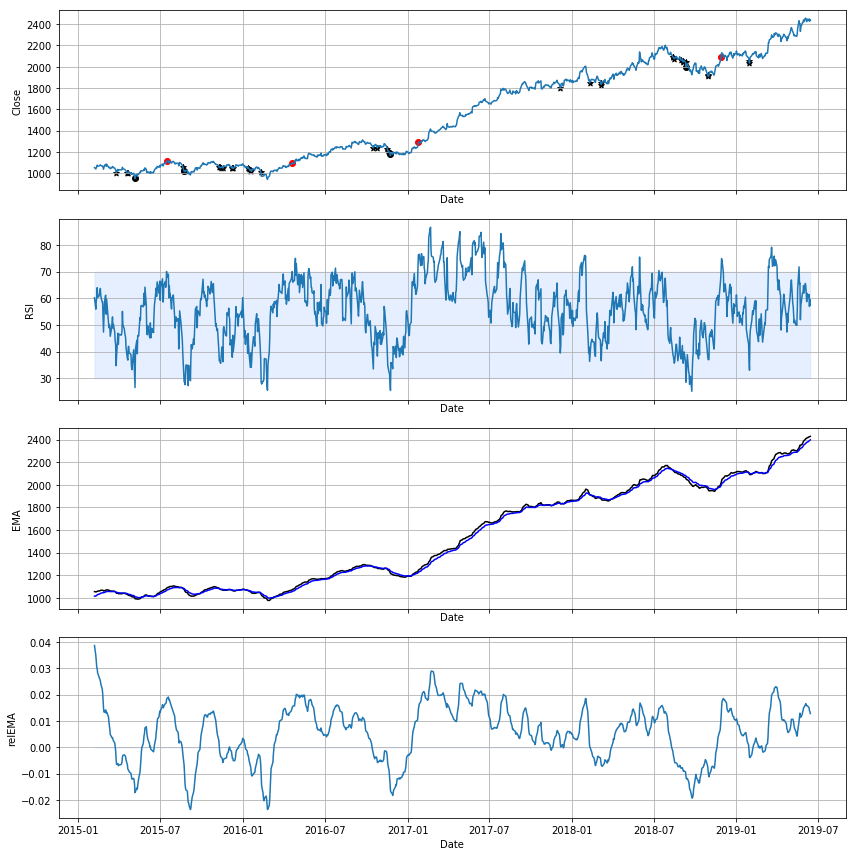

In [135]:
fig, (ax0, ax1, ax2,ax3) = plt.subplots(4, 1, sharex=True, figsize=(12, 12))
ax0.plot(index, price['Close'], label='Close')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close')
ax0.grid()
for day, holding in holdings.iterrows():
    order = holding['Order']
    if order > 0:
        ax0.scatter(x=day, y=price.loc[day, 'Close'], color='black')
    elif order < 0:
        ax0.scatter(x=day, y=price.loc[day, 'Close'], color='red')
        
for day, holding in holdings1.iterrows():
    point = holding['Pointer']
    if point == 1:
        ax0.scatter(x=day, y=price.loc[day, 'Close'], color='black', marker='*')
    end

ax1.plot(index, price['RSI'], label='RSI')
ax1.fill_between(index, y1=30, y2=70, color='#adccff', alpha='0.3')
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

'''
ax2.plot(index, price['BB_up'], label='BB_up')
ax2.plot(index, price['Close'], label='Close')
ax2.plot(index, price['BB_low'], label='BB_low')
ax2.fill_between(index, y1=price['BB_low'], y2=price['BB_up'], color='#adccff', alpha='0.3')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bollinger Bands')
ax2.grid()
'''

ax2.plot(index, price['EMA12'], label='macd',color='black')
ax2.plot(index, price['EMA26'], label='macd',color='blue')
#ax3.fill_between(index, y1=20, y2=80, color='#adccff', alpha='0.3')
ax2.set_xlabel('Date')
ax2.set_ylabel('EMA')
ax2.grid()

ax3.plot(index, price['relEMA'], label='relEMA')
ax3.fill_between(index, y1=0, y2=0, color='#adccff', alpha='0.3')
ax3.set_xlabel('Date')
ax3.set_ylabel('relEMA')
ax3.grid()





fig.tight_layout()
plt.show()

In [98]:
plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig, filename='ASHOK')

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:451: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

